Diabetes detection challenge using KNN algorithm Bascially we have 8 parameters in our given data set what we are goin to do that we will will predict on teh basis of parameters that a person is suffering from diabetes or not which will be decided on the basis of 0 and 1

# Diabetes detection challenge

In [3]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import the data from the given csv files
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# command is checking wether the null values is present in our data or 
# not
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
new_column_name='BP'
df.rename(columns={'BloodPressure':new_column_name},inplace=True)

In [8]:
new_column_name='DPF' # Dpf is for diabetesPedigree function
df.rename(columns={'DiabetesPedigreeFunction':new_column_name},inplace=True)

In [9]:
# new_column_name='ST' # ST stands for the skin thickness
# df.rename(columns={'Skin Thickness':new_column_name},inplace=True)

In [10]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# here while creatin the copy the term deep=True means that if the data set is recursively created than it can be easily copied 
data_copy = df.copy(deep = True)
data_copy[['Glucose','BP','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BP','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data_copy.isnull().sum()

Pregnancies        0
Glucose            5
BP                35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

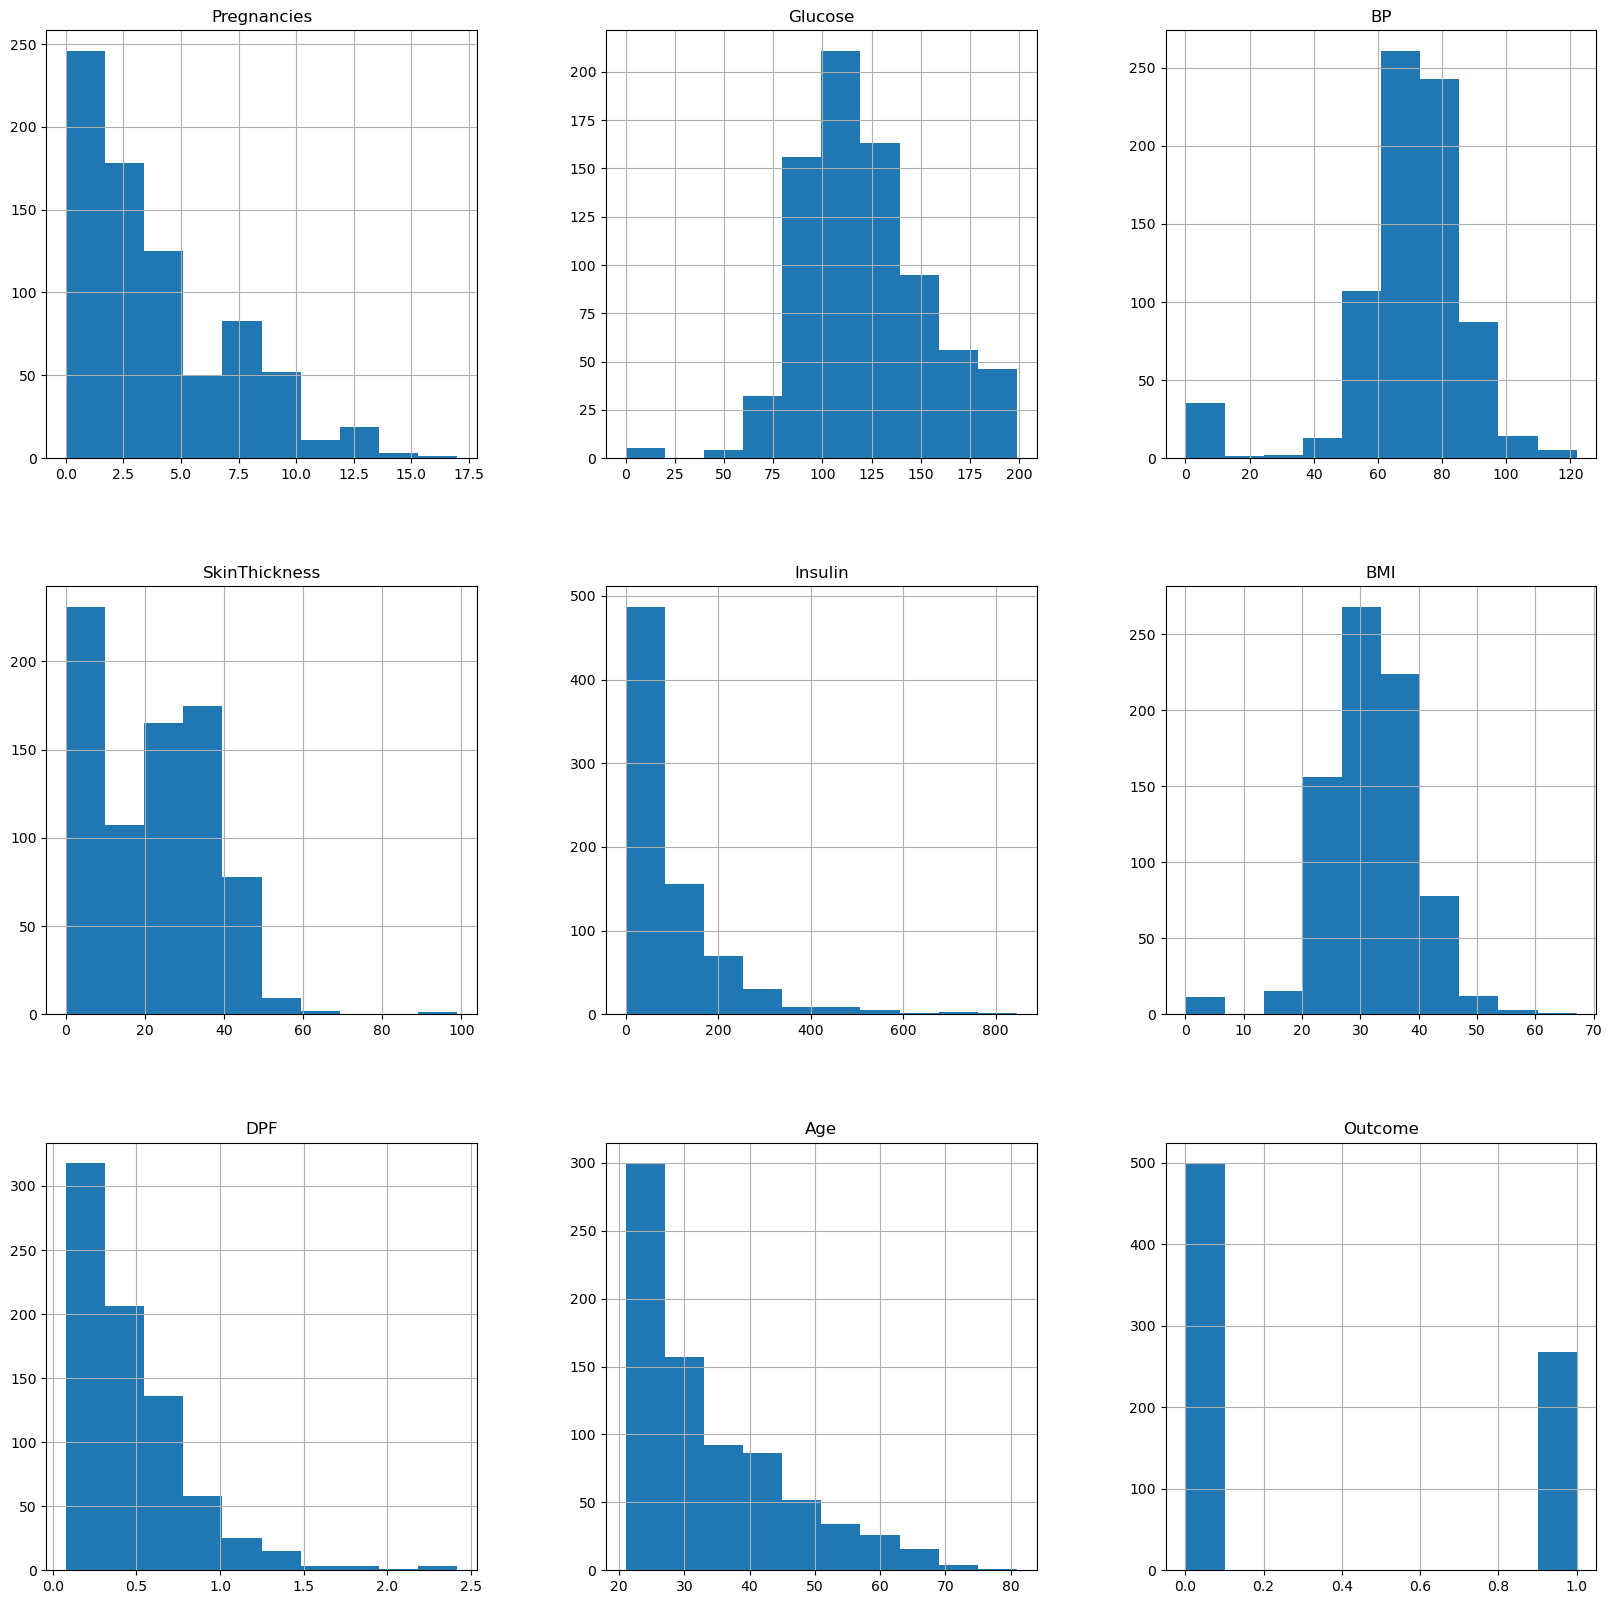

In [12]:
p=df.hist(figsize=(20,20))

In [13]:
# Now filling the missing values in the data
# handeling the missing values for the data with mean mode or median
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
data_copy['BP'].fillna(data_copy['BP'].mean(),inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].median(),inplace=True)

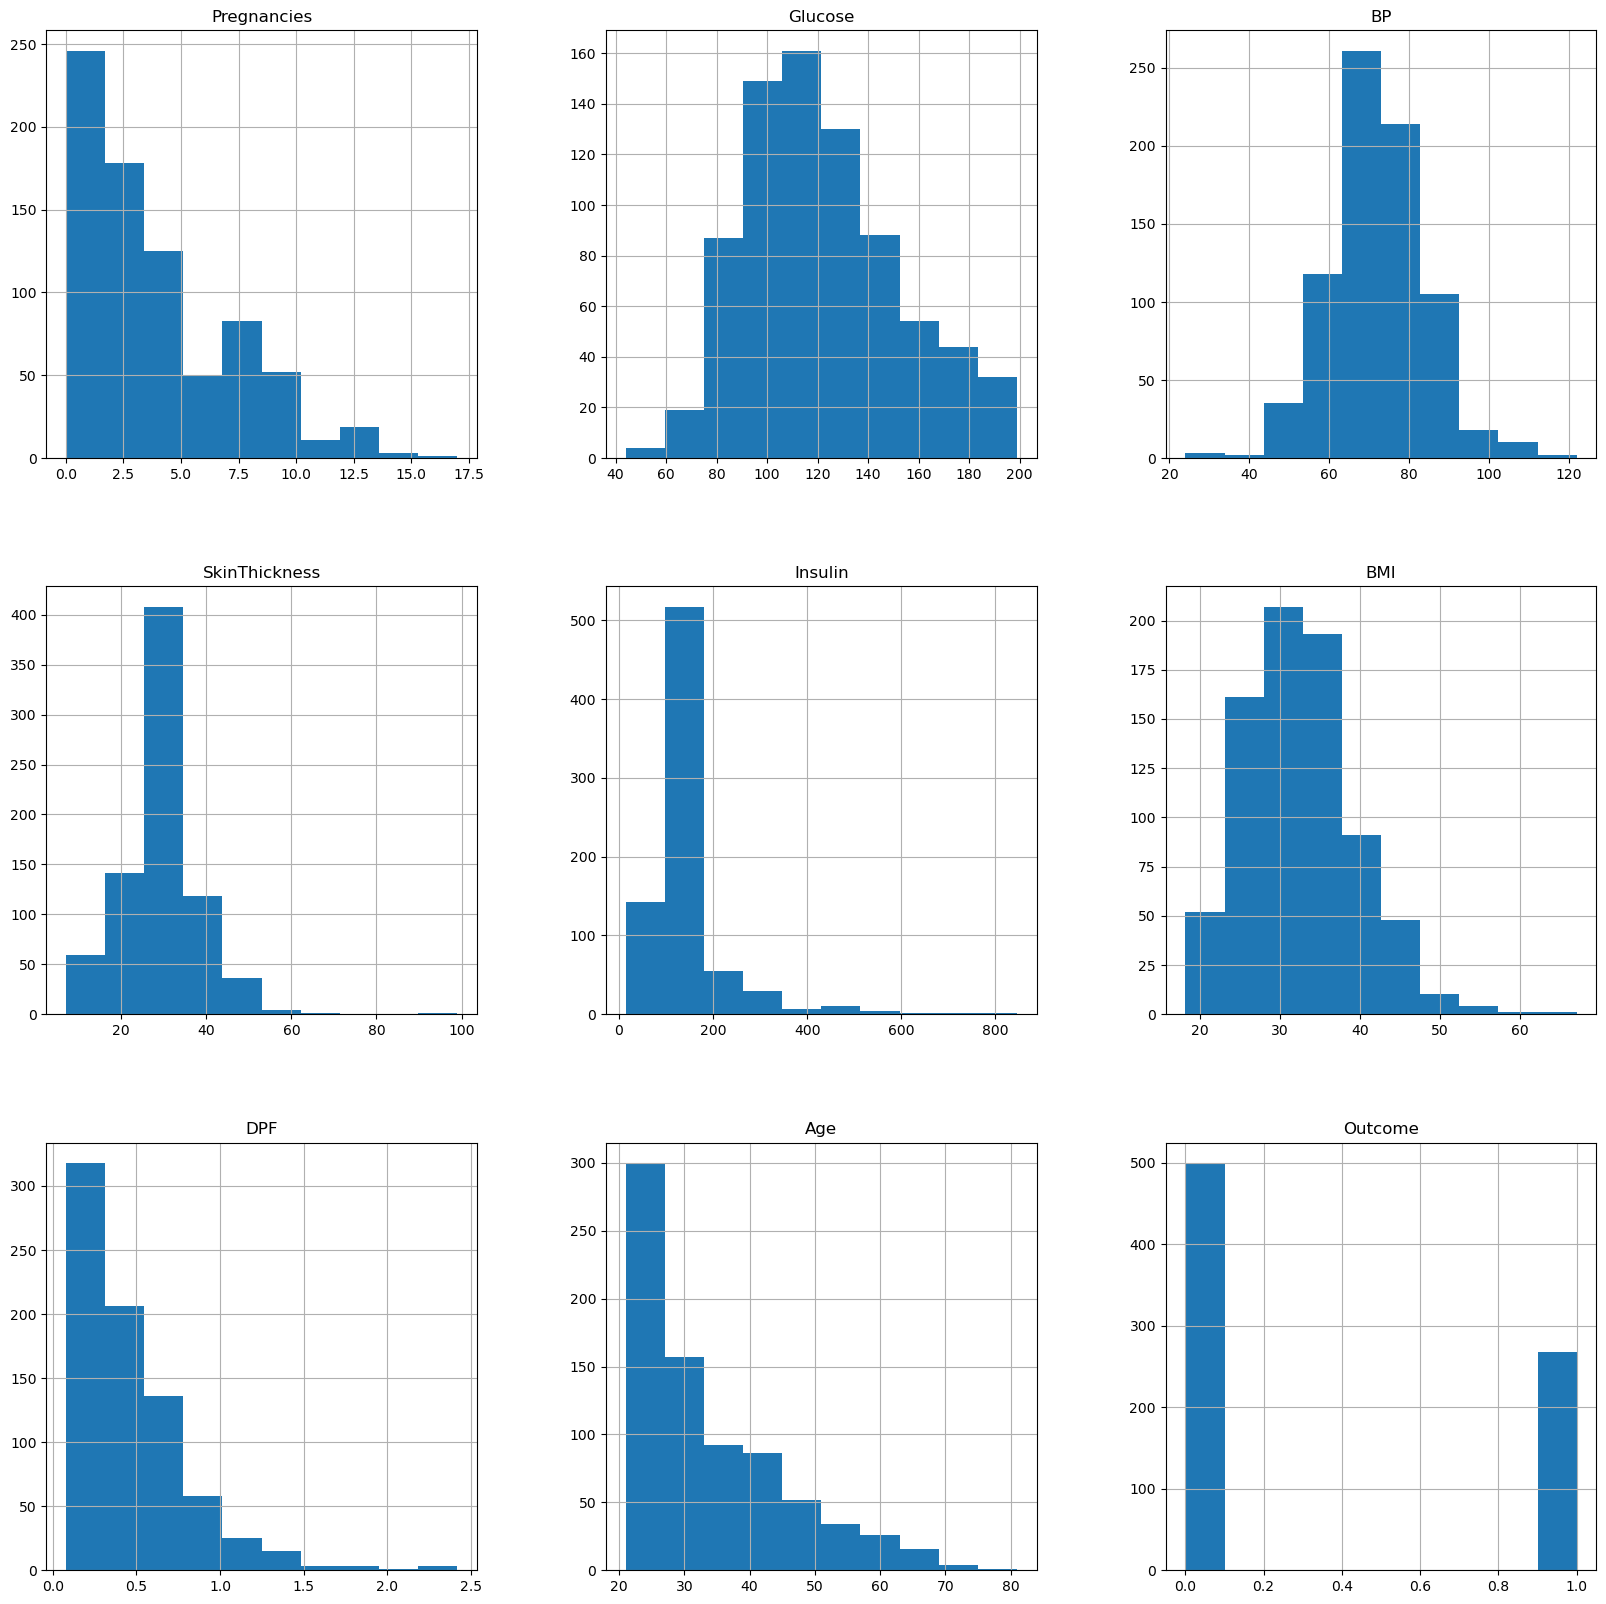

In [14]:
p=data_copy.hist(figsize=(20,20))

In [15]:
# import missingno as msno
# p = msno.bar(df)

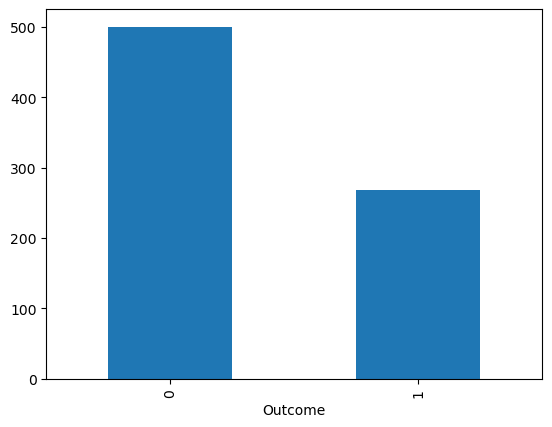

In [16]:
p=df.Outcome.value_counts().plot(kind='bar')

C:\Users\Vasudev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


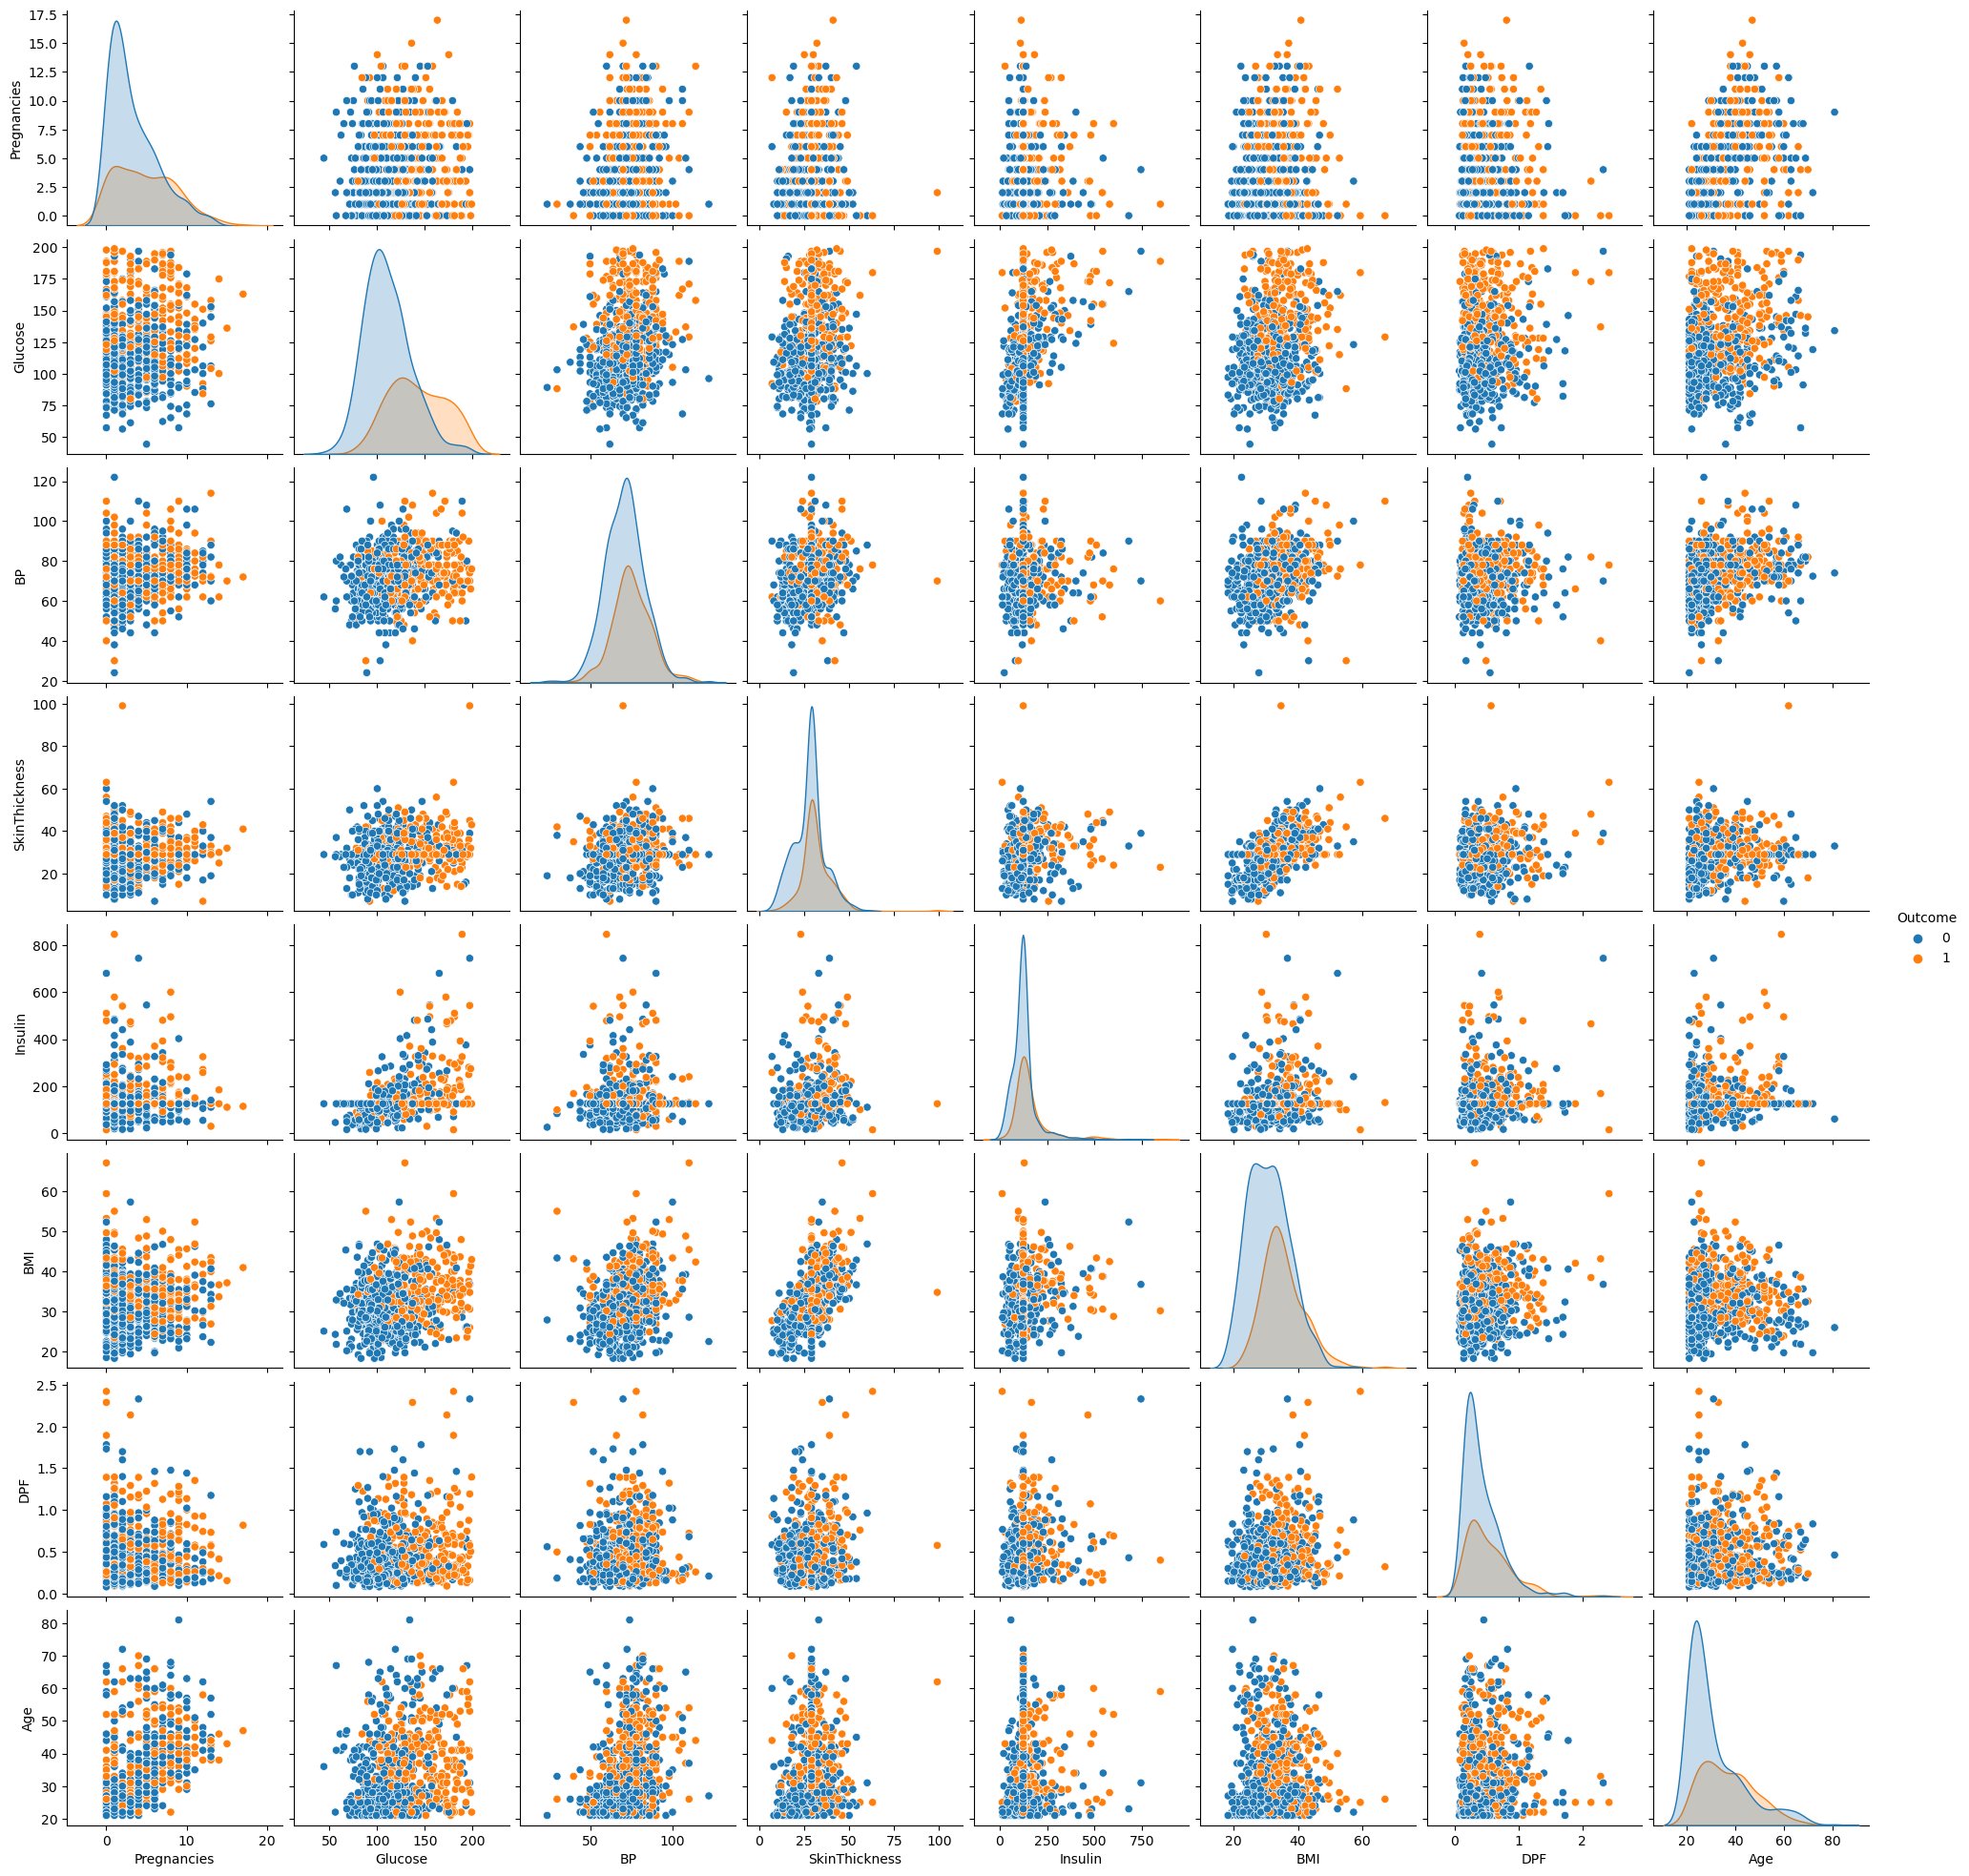

In [17]:
# importing the seaborn library for more visualization of the data
import seaborn as sns
p=sns.pairplot(data_copy,hue='Outcome')
# hue mein hum vo pass karte hai hume jiske basis par data comparison karvan hota hai

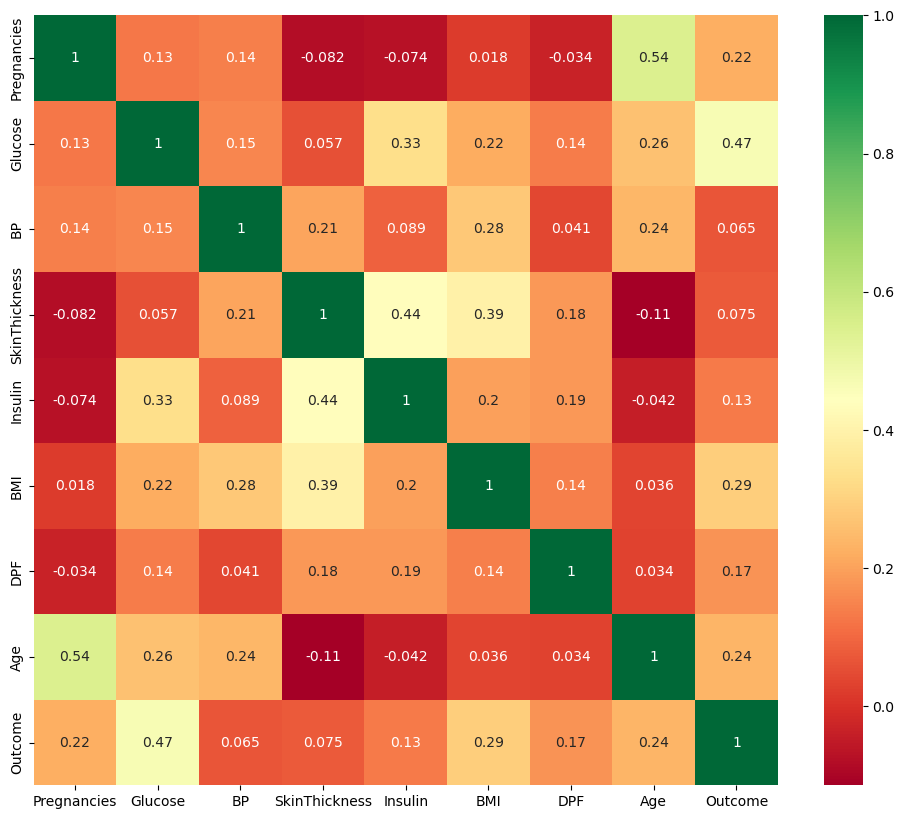

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # se

In [19]:
# from the above we can intepret that which of the values are highly coorelated and which values are less correlated


In [20]:
# Now we are applying the standard scale to the given data 
# Now use of stadard scale is that it will normalize the whole data to a particular scale 
# hence due to this it will become easy for the ml models to understand
from sklearn.preprocessing import StandardScaler

In [21]:
sc_X=StandardScaler()

In [22]:
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"], axis =1),),columns=['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age'])

In [23]:
X.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [24]:
y=data_copy.Outcome

In [25]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [36]:
# Now spliting the data for the training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [37]:
# Now checking the shape of train and test checking wether the data get divided equaly or not
X_train.shape

(614, 8)

In [38]:
Y_train.shape

(614,)

In [39]:
X_test.shape

(154, 8)

In [40]:
Y_test.shape

(154,)

In [42]:
# Now training our knn model
from sklearn.neighbors import KNeighborsClassifier

train_scores=[]
test_scores=[]
for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))

In [43]:
train_scores

[1.0,
 0.8697068403908795,
 0.8583061889250815,
 0.8322475570032574,
 0.8436482084690554,
 0.8175895765472313,
 0.8224755700325733,
 0.8143322475570033,
 0.8241042345276873,
 0.8192182410423453,
 0.8224755700325733,
 0.8208469055374593,
 0.8241042345276873,
 0.8127035830618893]

In [46]:
# after training we are testing our data
for i in range(1,15):
    test_scores.append(knn.score(X_test,Y_test))

In [47]:
test_scores

[0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143]

In [48]:
max_test_score=max(test_scores)

In [53]:
print("The maximum score after testing is",max_test_score*100)

The maximum score after testing is 71.42857142857143


In [51]:
max_train_score=max(train_scores)
max_train_score

1.0

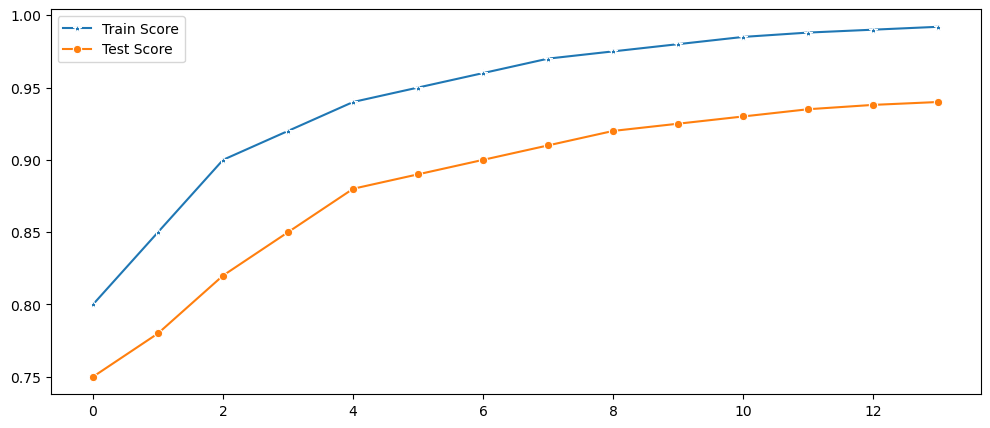

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns  

plt.figure(figsize=(12, 5))


p = sns.lineplot( train_scores, marker='*', label='Train Score')
p = sns.lineplot( test_scores, marker='o', label='Test Score')

plt.show()  

# this shows  the comparson between the training and testing scores 
# bascially used to check how our model isnperforming well after the trainin g part

In [62]:
# K=11
knn=KNeighborsClassifier(11)

knn.fit(X_train,Y_train)
d=knn.score(X_test,Y_test)



In [64]:
print("when the k=11 then the accuracy of the model is",d*100)

when the k=11 then the accuracy of the model is 71.42857142857143


In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score

In [76]:
y_pred=knn.predict(X_test)

In [78]:
sns_matrix=confusion_matrix(Y_test,y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

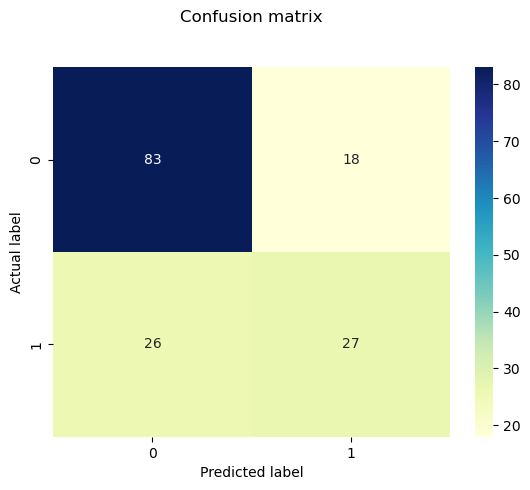

In [82]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [96]:
# now we are evaluating our model through diifernet parameters
# accurcact_score
# precision score
# recall score
# f1 score
 # f2 score
def model_evaluation(Y_test,y_pred,model_name):
    acc=accuracy_score(Y_test,y_pred)
    prec=precision_score(Y_test,y_pred)
    rec=recall_score(Y_test,y_pred)
    f1=f1_score(Y_test,y_pred)
    f2=fbeta_score(Y_test,y_pred,beta=2.0)
    results=pd.DataFrame([[model_name,acc,prec,rec,f1,f2]],
                        columns=["Model","Accuracy","Precision","Recall",
                                "F1score","F2Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results
model_evaluation(Y_test,y_pred,"KNN")

KeyError: 'F2 Score'

In [95]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results



model_evaluation(Y_test, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.714286,0.6,0.509434,0.55102,0.525292


In [97]:
# Alternate way
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       101
           1       0.60      0.51      0.55        53

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

